#PROJECT DEFINITION

1. Domain: Botany used in statistics research, agriculture, seeds, wheat
2. Problem statement
	a. Inputs: Seven features of wheat seeds
	b. Learning: We will create a classification model
	c. Output: Type/classes of wheat
3. Metric: We will use BIC to assess performance
4. Data summary: n=210, classes=3 (Kama, Rosa and Canadian - 70 points each), P=7,
    Features=(area A, perimeter P, compactness C = 4*pi*A/P^2, length of kernel, width of kernel,  asymmetry coefficient, length of kernel groove), plots=(pair, distribution, and box), source=https://archive.ics.uci.edu/ml/datasets/seeds
5. Solution proposal: Use Logistic Regression in Python
6. Benchmark Model: Guess all 'Kama' for classification
7. Plan: get and load the data (handle headers and separators), evaluate loaded data, visualize the data (plots), sampling size, benchmark, feature selection/model development (RFE and BIC - backward selection to go through all features manually for best fit), train-test split, assess the model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [3]:
#Get and load the data

SEEDS_DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'
seeds_df = pd.read_csv(SEEDS_DATA_URL, sep="\s+", header=None)
seeds_df.columns = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","AsymmetryCoefficient","KernelGrooveLength","VarietyType"]

In [4]:
seeds_df.to_csv('Seeds.csv', header=["Area","Perimeter","Compactness","KernelLength","KernelWidth","AsymmetryCoefficient","KernelGrooveLength","VarietyType"])

In [5]:
#Evaluate the data

seeds_df.shape

(210, 8)

In [6]:
seeds_df.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,VarietyType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [7]:
seeds_df.tail()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,VarietyType
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [8]:
seeds_df.sample(5)

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoefficient,KernelGrooveLength,VarietyType
16,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,1
11,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,1
133,16.16,15.33,0.8644,5.845,3.395,4.266,5.795,2
31,15.49,14.94,0.8724,5.757,3.371,3.412,5.228,1
25,16.19,15.16,0.8849,5.833,3.421,0.903,5.307,1


<Figure size 720x720 with 0 Axes>

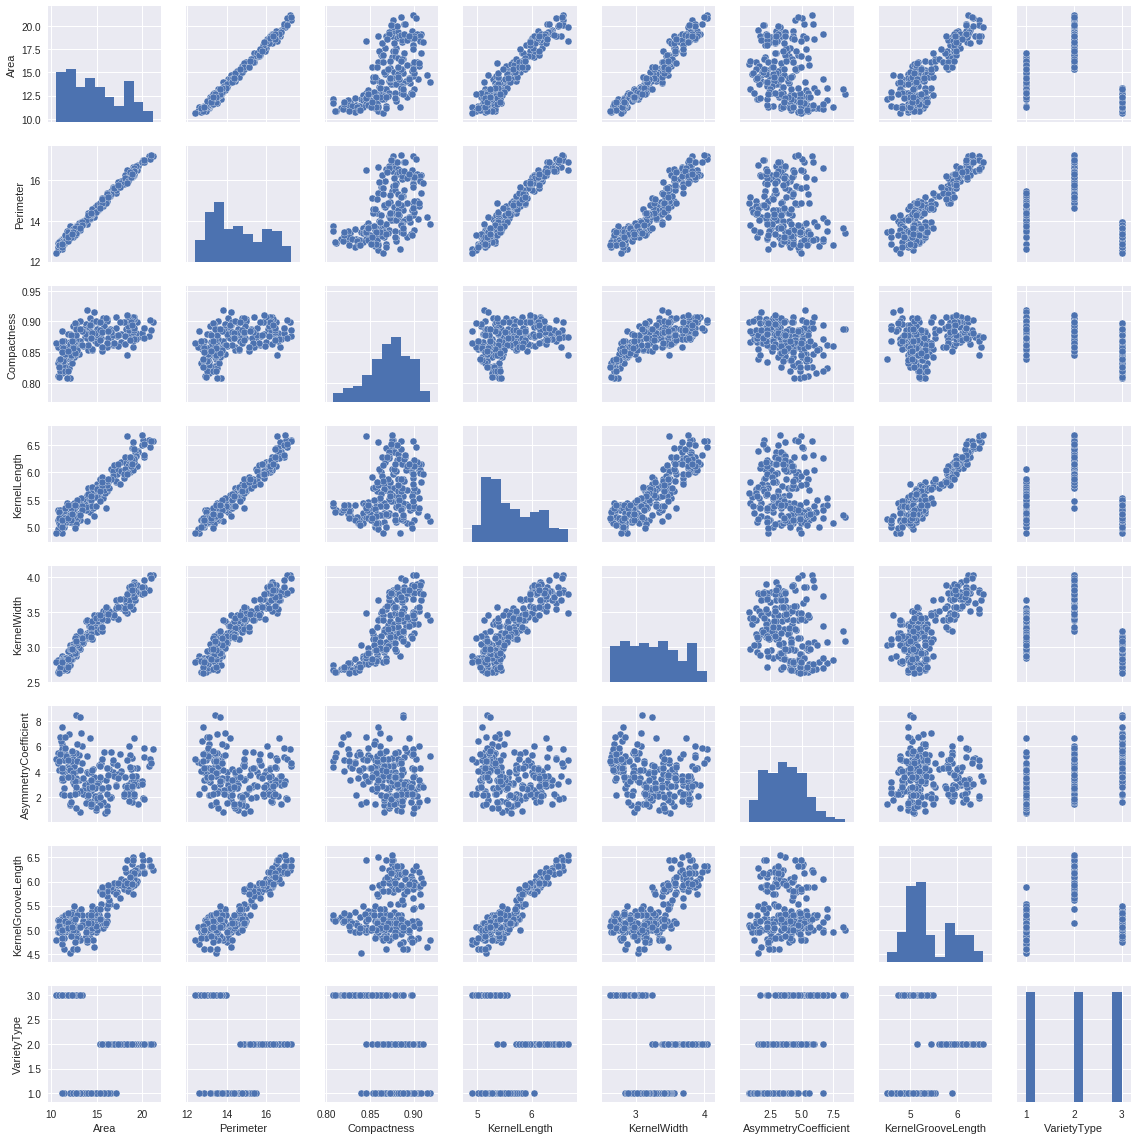

In [9]:
#Visualize the data

plt.figure(1, (10,10))
sns.pairplot(seeds_df, size=2, aspect=1)

In [10]:
seeds_melt = pd.melt(seeds_df.select_dtypes([float]))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


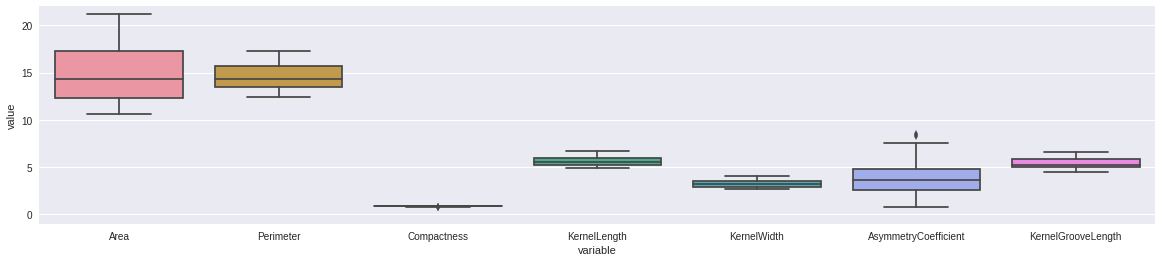

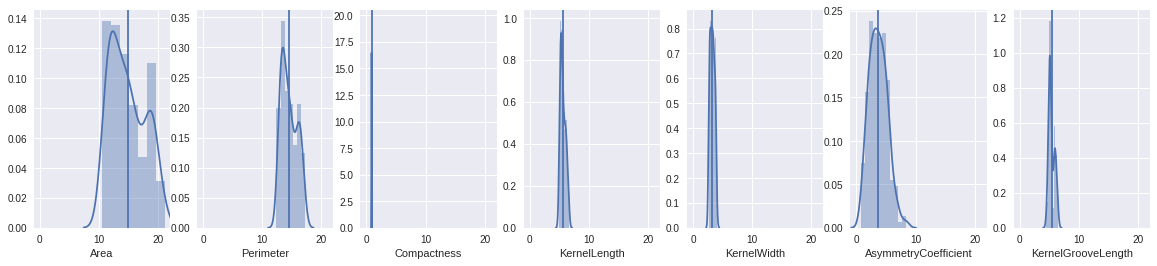

In [11]:
fig = plt.figure(figsize=(20,4))
sns.boxplot(x='variable', y='value', data=seeds_melt)
plt.ylim(-1,22)

num_feat = 7

_, ax = plt.subplots(1,num_feat, figsize=(20,4))
seeds_numerical_df = seeds_df.select_dtypes([float])

for i, feat in enumerate(seeds_numerical_df.columns):
    sns.distplot(seeds_numerical_df[feat], ax=ax[i])
    ax[i].set_xlim(-1,22)
    ax[i].axvline(seeds_numerical_df[feat].mean())

In [12]:
np.random.seed(42)

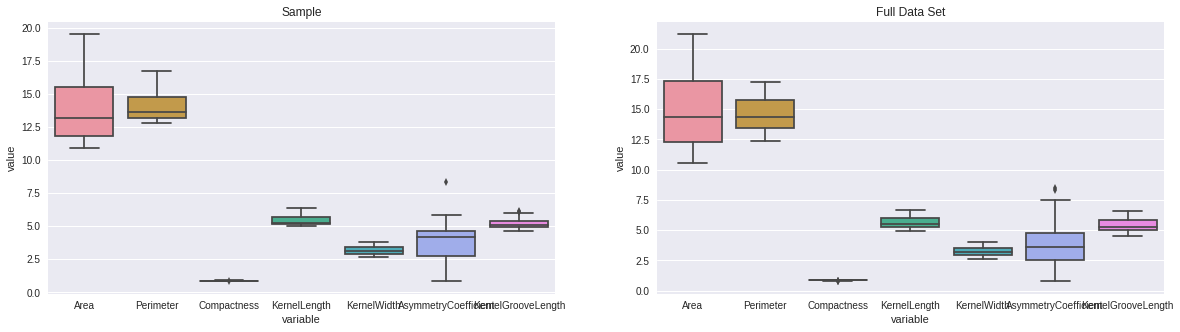

In [13]:
#Sampling and sample size

sample_15 = seeds_df.sample(15)

sample_15_melt = pd.melt(sample_15.select_dtypes([float]))
seeds_melt = pd.melt(seeds_df.select_dtypes([float]))

_, ax = plt.subplots(1, 2, figsize=(20,5))

sns.boxplot(x='variable', y='value', data=sample_15_melt, ax=ax[0])
ax[0].set_title('Sample')

sns.boxplot(x='variable', y='value', data=seeds_melt, ax=ax[1])
ax[1].set_title('Full Data Set');

In [14]:
def feature_error_by_n(data, feature, n):
    sample = data[feature].sample(n)
    error = np.abs((data[feature].mean() - sample.mean())/data[feature].mean())
    return error

In [15]:
compactness_error_by_n = [feature_error_by_n(seeds_df, 'Compactness', n) for n in range(1,210)]
perimeter_error_by_n = [feature_error_by_n(seeds_df, 'Perimeter', n) for n in range(1,210)]
kernelgroovelength_error_by_n = [feature_error_by_n(seeds_df, 'KernelGrooveLength', n) for n in range(1,210)]

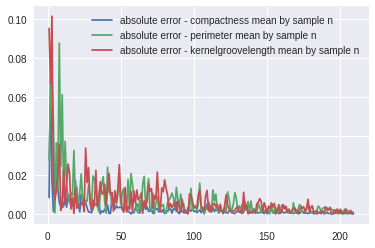

In [16]:
plt.plot(range(1,210), compactness_error_by_n, label='absolute error - compactness mean by sample n')
plt.plot(range(1,210), perimeter_error_by_n, label='absolute error - perimeter mean by sample n')
plt.plot(range(1,210), kernelgroovelength_error_by_n, label='absolute error - kernelgroovelength mean by sample n')
plt.legend()

Sampling estimate = 30

In [17]:
#Benchmark  
#Assume all variety types are 1 - Kama

In [18]:
#Feature selection/model development
# Recursive Feature Elimination: https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load the seeds dataset
target = seeds_df['VarietyType']
features = seeds_df.drop(['VarietyType'], axis=1)
feature_names = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","AsymmetryCoefficient","KernelGrooveLength"]
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

#list rankings for different # features
print('Feature names:',feature_names)
print(' ')
num_list = list(range(7))

print('Ranking by significant feature count')
for i in num_list:
    rfe = RFE(model, i+1)  #model, number of significant features
    rfe = rfe.fit(features, target)
    print(i+1,', ', rfe.ranking_)

print(' ')
print('Recommend by significant feature count')
for i in num_list:
    rfe = RFE(model, i+1)  #model, number of significant features
    rfe = rfe.fit(features, target)
    print(i+1,', ', rfe.support_)

Feature names: ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'KernelGrooveLength']
 
Ranking by significant feature count
1 ,  [3 2 7 4 5 6 1]
2 ,  [2 1 6 3 4 5 1]
3 ,  [1 1 5 2 3 4 1]
4 ,  [1 1 4 1 2 3 1]
5 ,  [1 1 3 1 1 2 1]
6 ,  [1 1 2 1 1 1 1]
7 ,  [1 1 1 1 1 1 1]
 
Recommend by significant feature count
1 ,  [False False False False False False  True]
2 ,  [False  True False False False False  True]
3 ,  [ True  True False False False False  True]
4 ,  [ True  True False  True False False  True]
5 ,  [ True  True False  True  True False  True]
6 ,  [ True  True False  True  True  True  True]
7 ,  [ True  True  True  True  True  True  True]


Automatically created module for IPython interactive environment
Feature names: ['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth', 'AsymmetryCoefficient', 'KernelGrooveLength']
 
Feature ranking:
1. (0.245311) feat 1 - Perimeter
2. (0.163106) feat 0 - Area
3. (0.159212) feat 6 - KernelGrooveLength
4. (0.141767) feat 4 - KernelWidth
5. (0.137161) feat 3 - KernelLength
6. (0.085560) feat 5 - AsymmetryCoefficient
7. (0.067882) feat 2 - Compactness


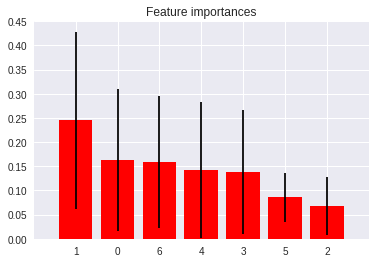

In [20]:
#Feature importance more sampling: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# load the seeds dataset 
target = seeds_df['VarietyType']
features = seeds_df.drop(['VarietyType'], axis=1)
feature_names = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","AsymmetryCoefficient","KernelGrooveLength"]


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100, random_state=0)

forest.fit(features, target)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print('Feature names:',feature_names)
print(' ')

print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. (%f) feat %d - %s" % (f + 1, importances[indices[f]], indices[f], feature_names[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

In [26]:
#BIC Evaluate model.
def BIC(lr_model, features, target):
    predictions = lr_model.predict_proba(features)
    n = features.shape[0]
    p = features.shape[1]
    complexity = np.log(n)*(p+1)
    likelyhood = -2*log_loss(target, predictions)
    return complexity - likelyhood

In [27]:
#BIC values
#Feature selection models based on feature importance
model_list = [ \
    'target ~ 1 + Area + Perimeter + Compactness + KernelLength + KernelWidth + AsymmetryCoefficient + KernelGrooveLength', \
    'target ~ 1                    + Compactness                                                                                       ', \
    'target ~ 1                                                               + AsymmetryCoefficient                                                                                       ', \
    'target ~ 1 + Area + Perimeter               + KernelLength + KernelWidth + AsymmetryCoefficient + KernelGrooveLength', \
    'target ~ 1 + Area + Perimeter               + KernelLength + KernelWidth                        + KernelGrooveLength', \
    'target ~ 1 + Area + Perimeter                              + KernelWidth                        + KernelGrooveLength', \
    'target ~ 1 + Area + Perimeter                                                                   + KernelGrooveLength', \
    'target ~ 1 + Area + Perimeter                                                                                       ', \
    'target ~ 1        + Perimeter                                                                                       ' ]
    
# load the seeds dataset
import patsy
from sklearn.metrics import log_loss

target = seeds_df['VarietyType']
features = seeds_df.drop(['VarietyType'], axis=1)
feature_names = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","AsymmetryCoefficient","KernelGrooveLength"]

bic_model = np.tile(0.0, len(model_list))

for m in list(range(len(model_list))):
    target_model, features_model = patsy.dmatrices(model_list[m], features)

    seeds_lr = LogisticRegression()
    seeds_lr.fit(features_model, target_model)
    #print(m, "%f" %BIC(seeds_lr, features_model, target_model))
    bic_model[m] = BIC(seeds_lr, features_model, target_model)

bic_sort = np.argsort(bic_model)[::-1]
print("Best BIC Model")
for m in list(range(len(model_list))):
    model_name = model_list[bic_sort[m]]
    print(m+1, "%f" %bic_model[bic_sort[m]], model_name[13:len(model_name)])
    

Best BIC Model
1 48.617510 Area + Perimeter + Compactness + KernelLength + KernelWidth + AsymmetryCoefficient + KernelGrooveLength
2 43.271747 Area + Perimeter               + KernelLength + KernelWidth + AsymmetryCoefficient + KernelGrooveLength
3 38.034636 Area + Perimeter               + KernelLength + KernelWidth                        + KernelGrooveLength
4 32.698650 Area + Perimeter                              + KernelWidth                        + KernelGrooveLength
5 27.357053 Area + Perimeter                                                                   + KernelGrooveLength
6 22.332146 Area + Perimeter                                                                                       
7 18.223094                  + Compactness                                                                                       
8 17.866870                                                             + AsymmetryCoefficient                                                                 

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


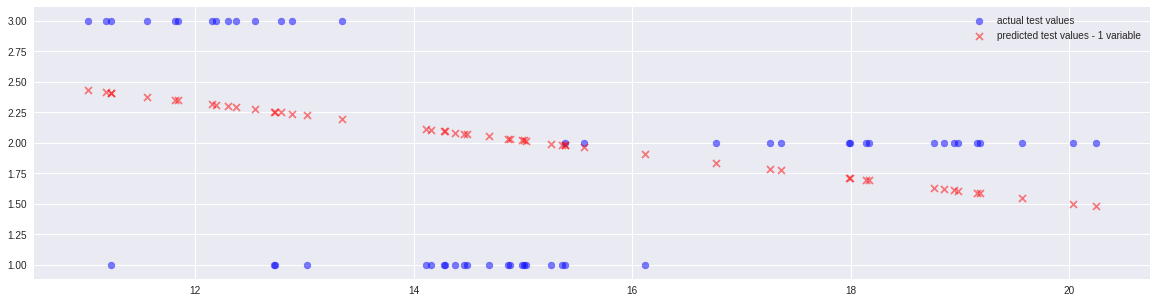

In [29]:
#Train Test Split - Single feature option
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_model, features_model = patsy.dmatrices('target ~ 1 + Area ', features)
X_train, X_test, y_train, y_test = train_test_split(features_model, target_model, random_state=10)

tt_lr_model = LinearRegression(fit_intercept=False)
tt_lr_model.fit(X_train, y_train)

seed_prediction_for_model = (tt_lr_model.predict(X_test))

plt.figure(1, (20,5))
plt.scatter(X_test[:, 1], y_test, 
            marker='o', color='blue', alpha=0.5, 
            label='actual test values')
plt.scatter(X_test[:, 1], seed_prediction_for_model,
            marker='x', color='red', alpha=0.5, 
            label='predicted test values - 1 variable')
plt.legend()

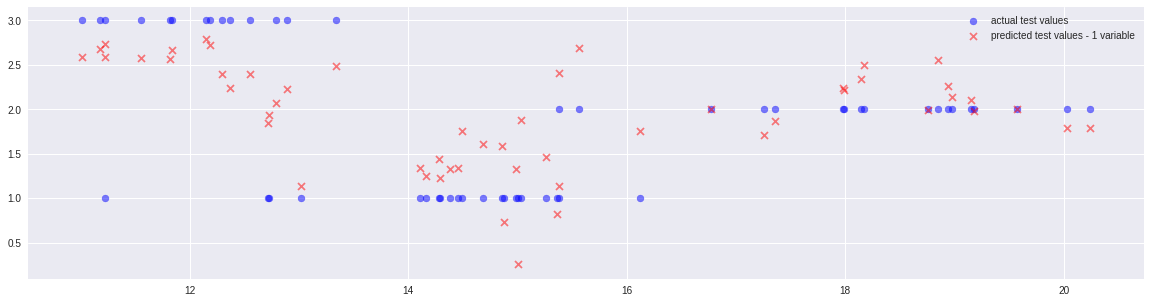

In [28]:
#Train Test Split - Final model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_model, features_model = patsy.dmatrices('target ~ 1 + Area + Perimeter               + KernelLength + KernelWidth                        + KernelGrooveLength', features)
X_train, X_test, y_train, y_test = train_test_split(features_model, target_model, random_state=10)

tt_lr_model = LinearRegression(fit_intercept=False)
tt_lr_model.fit(X_train, y_train)

seed_prediction_for_model = (tt_lr_model.predict(X_test))

plt.figure(1, (20,5))
plt.scatter(X_test[:, 1], y_test, 
            marker='o', color='blue', alpha=0.5, 
            label='actual test values')
plt.scatter(X_test[:, 1], seed_prediction_for_model,
            marker='x', color='red', alpha=0.5, 
            label='predicted test values - 1 variable')
plt.legend()

#Assess the Model

BIC results were inverse of what was expected.  Not certain if BIC calculation is correct or inverted which would then match other results.

Better and more consistent results were achieved using RFE - Recursive Feature Elimination.  It appears the best model for use would be:
Perimeter, Area, KernelGrooveLength, KernelWidth, and KernelLength

Train-Test split of this model corresponds to RFE results.  Selected model better predicts actual data than with a single feature.